In [1]:
from keras.models import load_model

/home/tony/anaconda3/envs/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
HOLDOUT=8
model = load_model("cnn_3d_64_64_3_HOLDOUT8_20180228_131156.hdf5")

In [3]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 64, 64, 3, 1) 0                                            
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 32, 32, 2, 64 22016       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 32, 32, 2, 64 256         conv3d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 32, 32, 2, 64 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

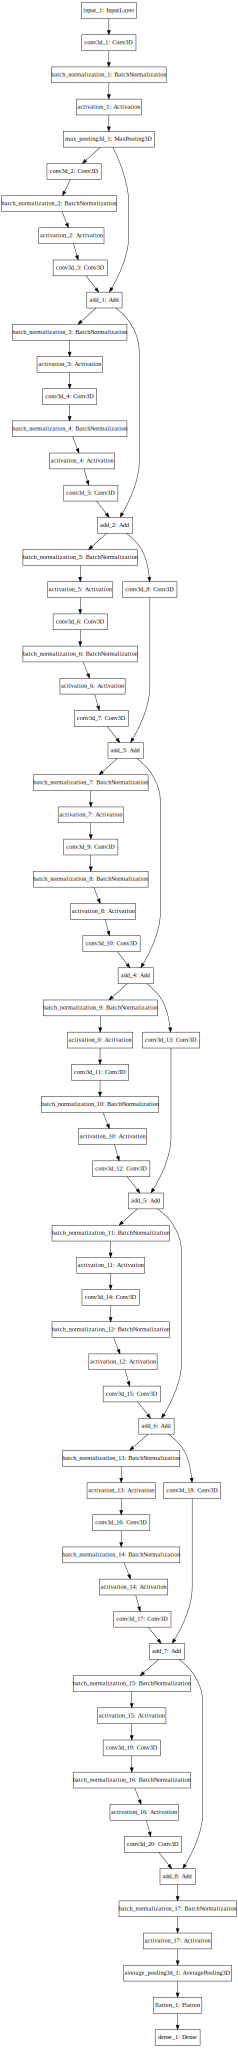

In [4]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [5]:
dot1 = model_to_dot(model).create(prog='dot', format='svg')

In [6]:
import h5py
import numpy as np

In [7]:
df = h5py.File("64x64x3-patch.hdf5", "r")

In [8]:
idx_subset = np.where(df["subsets"][:,0] == HOLDOUT)[0]

In [9]:
idx_class1 = np.where(df["output"][:,0] == 1)[0]

In [10]:
idx_subset_class1 = np.intersect1d(idx_subset, idx_class1)

In [11]:
imgs = df["input"][idx_subset_class1, :]

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

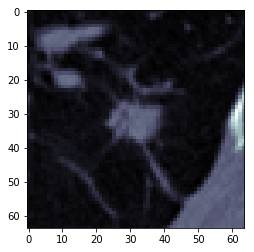

In [13]:
img = imgs[0,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

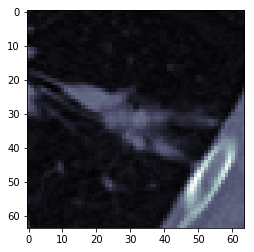

In [14]:
img = imgs[1,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

(-0.5, 63.5, 63.5, -0.5)

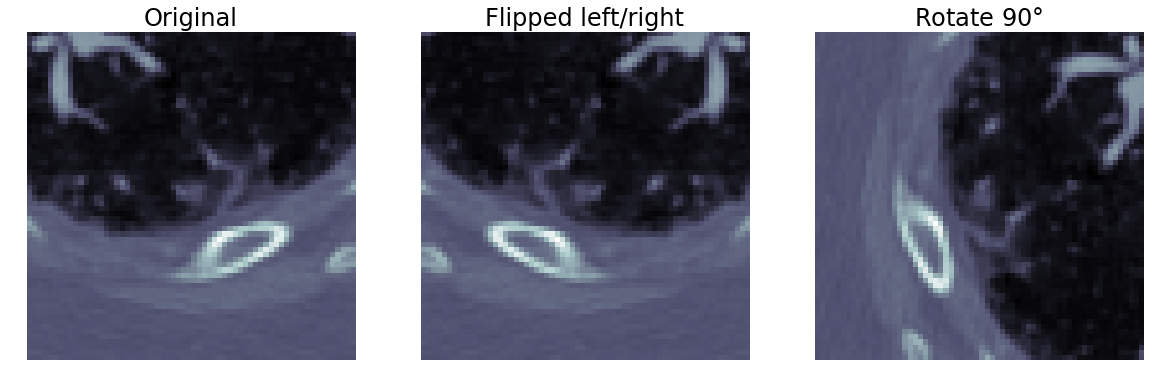

In [15]:
img = imgs[36,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

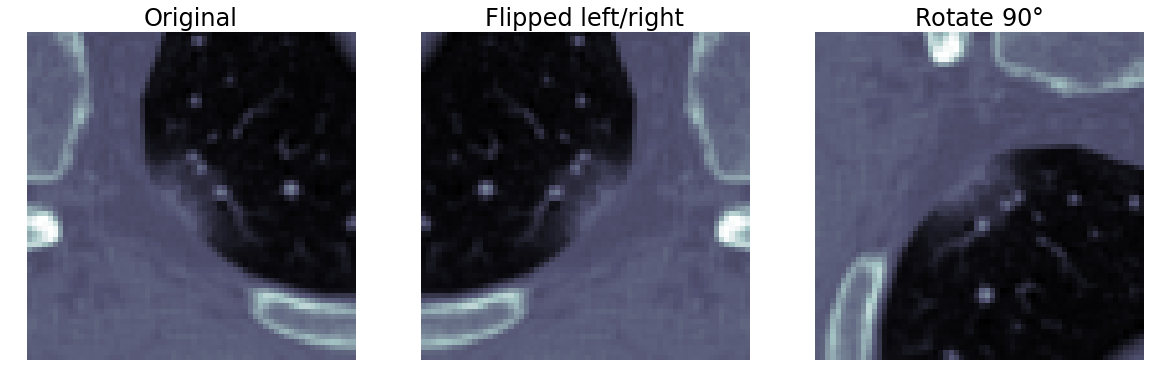

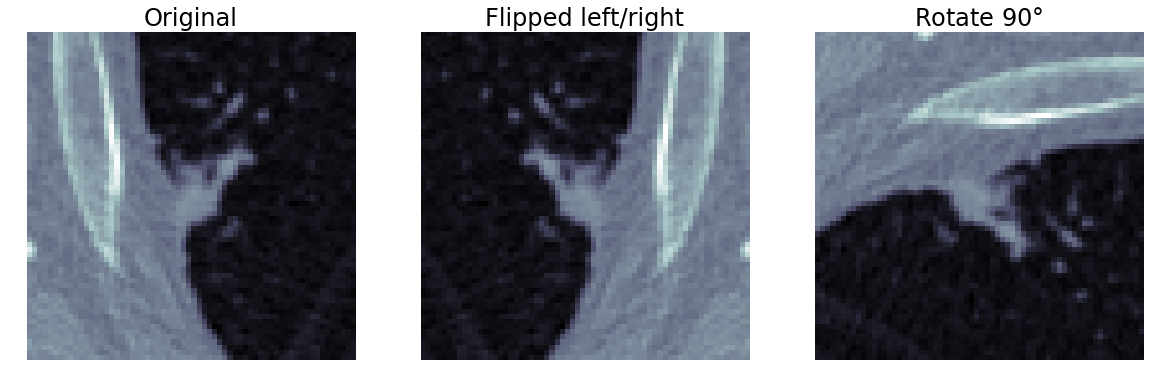

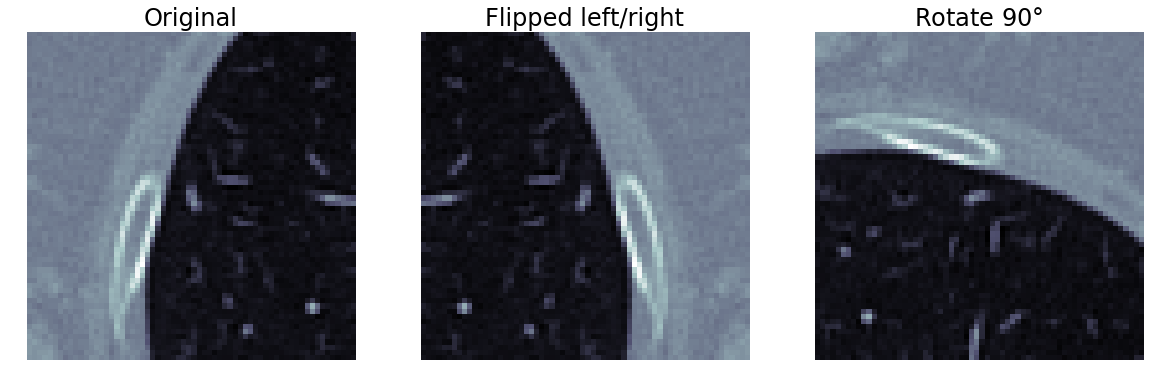

In [16]:
img = imgs[76,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");

img = imgs[5,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off")

img = imgs[33,:]
plt.figure(figsize=(20,20))
plt.subplot(1,3,1)
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.title("Original", fontsize=24)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(np.flip(img.reshape(3,64,64)[1,:,:],axis=1), cmap="bone")
plt.title("Flipped left/right", fontsize=24)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(np.rot90(img.reshape(3,64,64)[1,:,:], k=-1), cmap="bone");
plt.title(r'Rotate $90\degree$', fontsize=24)
plt.axis("off");



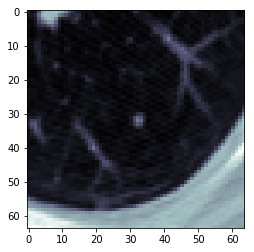

In [17]:
img = imgs[121,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

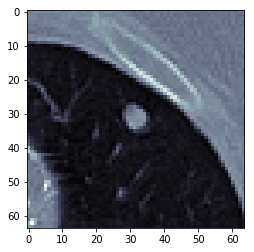

In [18]:
img = imgs[80,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")

In [19]:
imgs_reshaped = imgs.reshape(len(idx_subset_class1), 3, 64, 64, 1).swapaxes(1,3)

In [20]:
predictions = model.predict(imgs_reshaped)

In [21]:
sum(predictions > 0.5)

array([122])

In [22]:
len(predictions)

195

## Predict all subset

In [23]:
imgs = df["input"][idx_subset, :]
imgs_reshaped = imgs.reshape(len(idx_subset), 3, 64, 64, 1).swapaxes(1,3)

In [24]:
predictions = model.predict(imgs_reshaped, verbose=2)

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
y_true = df["output"][idx_subset, :]

In [27]:
predictions

array([[3.0510726e-05],
       [2.4099048e-05],
       [5.2960131e-06],
       ...,
       [1.7420098e-05],
       [5.3316185e-06],
       [6.3790867e-05]], dtype=float32)

In [56]:
pred_round = np.copy(predictions)
pred_round[np.where(pred_round > 0.5)[0]] = 1.0
pred_round[np.where(pred_round <= 0.5)[0]] = 0.0

In [57]:
confusion_matrix(y_true, pred_round)

array([[74086,   207],
       [   61,   134]])

In [28]:
confusion_matrix(y_true, np.round(predictions))

array([[74165,   128],
       [   73,   122]])

In [29]:
from sklearn.metrics import recall_score, precision_score, roc_auc_score

print("Recall = {}".format(recall_score(y_true, np.round(predictions))))
print("Precision = {}".format(precision_score(y_true, np.round(predictions))))
print("AUC = {}".format(roc_auc_score(y_true, predictions)))
      

Recall = 0.6256410256410256
Precision = 0.488
AUC = 0.9720619708451671


In [30]:
from sklearn.metrics import average_precision_score

average_precision_score(y_true, predictions)

0.481800387697434

In [59]:
from sklearn.metrics import roc_curve, auc
# Compute micro-average ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_true, predictions)
roc_auc = auc(fpr, tpr)

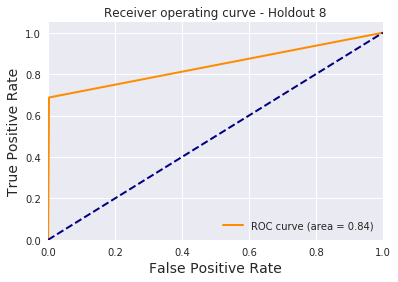

In [60]:
import seaborn as sns
sns.set()
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver operating curve - Holdout {}'.format(HOLDOUT))
plt.legend(loc="lower right")
plt.show()

In [33]:
predictions.shape

(74488, 1)

In [34]:
y_true.shape

(74488, 1)

In [35]:
bad = np.where(np.round(predictions)!=y_true)[0]

In [36]:
bad1_idx = np.where(y_true[bad] == 1)[0]

In [37]:
ii=bad[bad1_idx[0]]
y_true[ii]

array([1])

In [38]:
predictions[ii]

array([0.05763191], dtype=float32)

Text(0.5,1,'Prediction = 0.06, Truth 1')

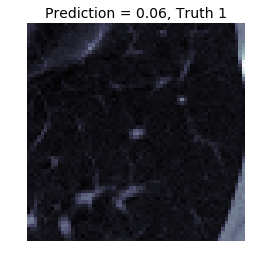

In [39]:
sns.reset_orig()
img = df["input"][ii,:]
plt.imshow(img.reshape(3,64,64)[1,:,:], cmap="bone")
plt.axis('off');
plt.title("Prediction = {:.2f}, Truth {}".format(predictions[ii][0], y_true[ii][0]), fontsize=14)

In [40]:
imgs.shape

(74488, 12288)

In [41]:
import pandas as pd

In [42]:
d = np.array([predictions, y_true])

In [43]:
dfp = pd.DataFrame(d[:,:,0].transpose())
dfp.columns = ["Prediction", "Truth"]

In [44]:
dfp.to_csv("predictions_truth_subset{}.csv".format(HOLDOUT))

In [45]:
dfp

,Prediction,Truth
0,3.051073e-05,0.0
1,2.409905e-05,0.0
2,5.296013e-06,0.0
3,9.178097e-06,0.0
4,9.029766e-01,1.0
5,5.763191e-02,1.0
6,1.545204e-05,0.0
7,2.946065e-05,0.0
8,1.224384e-05,0.0
9,1.645031e-05,0.0


In [46]:
df_out = pd.DataFrame((df["uuid"][idx_subset,:]).astype(str))
df_out.columns = ["seriesuid"]

df_out["coordX"] = df["centroid"][idx_subset, 0]
df_out["coordY"] = df["centroid"][idx_subset, 1]
df_out["coordZ"] = df["centroid"][idx_subset, 2]

In [47]:
df_out["probability"] = dfp["Prediction"]

In [48]:
df_out

,seriesuid,coordX,coordY,coordZ,probability
0,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,164.760000,-98.640000,-184.320000,3.051073e-05
1,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,79.660000,-78.010000,-63.700000,2.409905e-05
2,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,120.712350,-73.236738,-155.608810,5.296013e-06
3,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,-18.800000,-18.070000,-206.120000,9.178097e-06
4,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,170.159117,-40.218571,-149.120266,9.029766e-01
5,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,170.370000,-42.590000,-135.780000,5.763191e-02
6,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,173.010000,-108.300000,-131.200000,1.545204e-05
7,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,140.940000,-107.050000,-169.550000,2.946065e-05
8,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,43.279471,-79.231404,-48.161382,1.224384e-05
9,1.3.6.1.4.1.14519.5.2.1.6279.6001.675543413149...,89.790000,-159.600000,-90.070000,1.645031e-05


In [49]:
df_out.to_csv("predictions_subset{}.csv".format(HOLDOUT), index=False)